In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import entropy
import numpy as np 

### Characterization of database

In [4]:
# Data with only columns of interest
data = pd.read_csv('Data/dataEchoChambers_with_article_info.csv', usecols=['tw_id', 'fecha', 'usr_id', 'opinion_dinamic', 'url_expanded', 'medio'])

# Remove Diario Registrado for low data and TYC Sports to be a sports media
data = data[~data.medio.isin(['Diario Registrado','TYC Sports'])].copy()

In [5]:
# Head
data.head(n = 5)

,fecha,url_expanded,medio,opinion_dinamic,tw_id,usr_id
0,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101346910135377920,716295311342321665
1,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101346845589233665,271519704
2,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101350580142903296,987494618156675072
3,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101350441126936580,770375532
4,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101353444135370754,740350122974937088


In [6]:
# Number of times that an user share an url
print(f'Number of sharing events = {data.shape[0]}')

Number of sharing events = 1035447


In [7]:
print(f"Number of unique news = {data.drop_duplicates(subset=['url_expanded']).shape[0]}")

Number of unique news = 66784


In [8]:
print(f"Number of unique users = {data.drop_duplicates(subset=['usr_id']).shape[0]}")

Number of unique users = 123180


In [9]:
print(f"Number of unique media outlet = {data.drop_duplicates(subset=['medio']).shape[0]}")

Number of unique media outlet = 17


### Some plots

In [10]:
# Distribution of unique news
dist_unique_news = data.drop_duplicates(subset='url_expanded').groupby('medio').count()['url_expanded'].sort_values(ascending = False)

In [11]:
# Effective number of media 
effective_number_of_media = np.round(2**entropy(dist_unique_news.tolist(), base = 2))
print(effective_number_of_media)

13.0


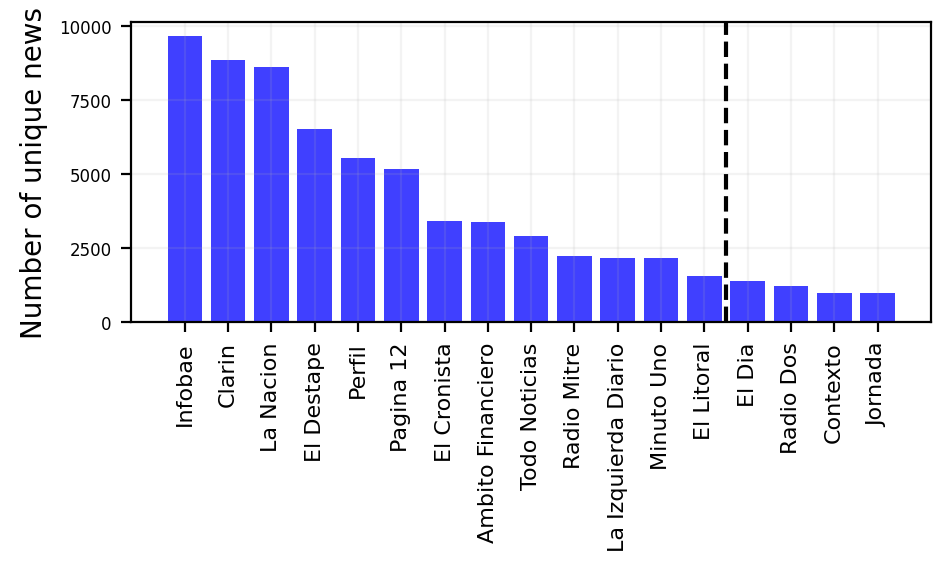

In [12]:
plt.figure(dpi = 200, figsize=(5,3))
plt.axes([0.15, 0.45, 0.80, 0.50])
plt.bar(range(dist_unique_news.shape[0]), dist_unique_news.to_list(), color = 'b', alpha = 0.75)
plt.xticks(range(dist_unique_news.shape[0]), dist_unique_news.index, rotation = 90, size = 8)
plt.axvline(effective_number_of_media - 0.5, color = 'k', linestyle = '--')
plt.yticks(size = 6)
plt.ylabel('Number of unique news', size = 10)
plt.grid(True, alpha = 0.15)
plt.savefig('Results/Distribution_unique_news.pdf')
plt.savefig('Results/Distribution_unique_news.png')
plt.show()

In [13]:
# Distribution of sharing news
dist_sharing_news = data.groupby('medio').count()['url_expanded'].sort_values(ascending = False)

In [14]:
# Effective number of media 
effective_number_of_media = np.round(2**entropy(dist_sharing_news.tolist(), base = 2))
print(effective_number_of_media)

8.0


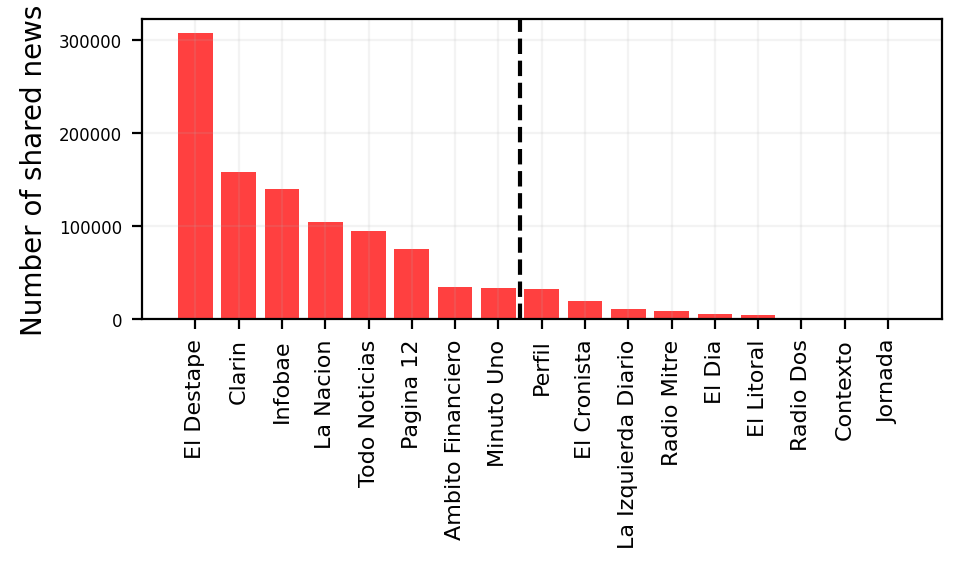

In [15]:
plt.figure(dpi = 200, figsize=(5,3))
plt.axes([0.15, 0.45, 0.80, 0.50])
plt.bar(range(dist_sharing_news.shape[0]), dist_sharing_news.to_list(), color = 'r', alpha = 0.75)
plt.xticks(range(dist_sharing_news.shape[0]), dist_sharing_news.index, rotation = 90, size = 8)
plt.axvline(effective_number_of_media - 0.5, color = 'k', linestyle = '--')
plt.yticks(size = 6)
plt.ylabel('Number of shared news')
plt.savefig('Results/Distribution_sharing_news.pdf')
plt.savefig('Results/Distribution_sharing_news.png')
plt.grid(True, alpha = 0.15)
plt.show()

### All in one figure 

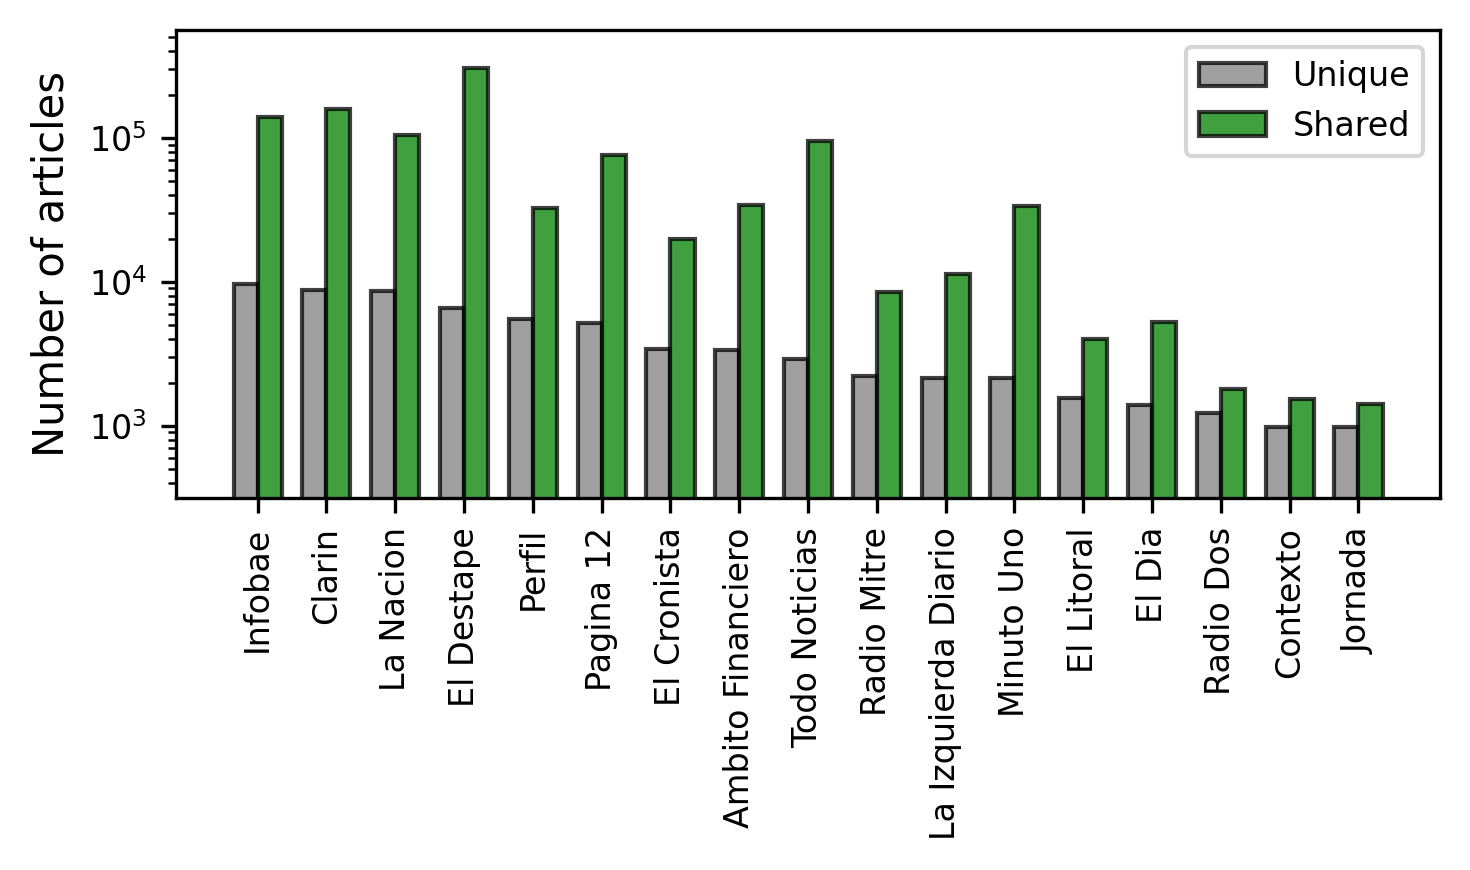

In [16]:
fig, ax1 = plt.subplots(figsize = (5,3), dpi = 300)

width = 0.35
ax1.bar(np.array(range(dist_unique_news.shape[0])) - width, dist_unique_news.to_list(), color = 'gray', edgecolor = 'k', alpha = 0.75,  width = width, align = 'edge', label = 'Unique')
ax1.bar(np.array(range(dist_unique_news.shape[0])), dist_sharing_news[dist_unique_news.index].to_list(), align = 'edge', edgecolor = 'k', color = 'green', alpha = 0.75, width = width, label = 'Shared')
ax1.set_xticks(range(dist_unique_news.shape[0]), dist_unique_news.index, rotation = 90, size = 8)

ax1.set_ylabel('Number of articles', size = 10, color = 'k')
ax1.tick_params(axis='y', labelcolor = 'k', labelsize = 8)
ax1.legend(loc = 'best', fontsize = 8)
ax1.set_yscale('log')
ax1.set_ylim([10**2.5, 10**5.75])
fig.tight_layout()
plt.savefig('Results/Distribution_news.pdf')
plt.savefig('Results/Distribution_news.png')
plt.show()